### Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Data

In [4]:
# feature / label
feature = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
label = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

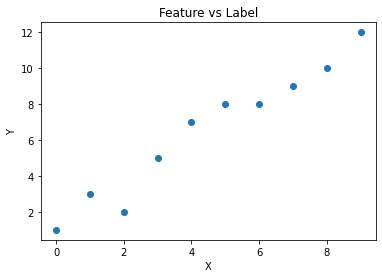

In [6]:
plt.scatter(feature, label)
plt.title("Feature vs Label")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Linear Regression

In [9]:
def cost_fn(Y, Y_Pred, size_):
    error = Y_Pred - Y
    return error, np.sum(error**2) * (2 / (size_))

In [144]:
def LR(X, Y, alpha=1e-2, n_iter=10000, threshold=1e-5):

    b, w = 0.0, 0.0
    
    b_s = []
    costs = []
    weights = []
    
    b_s.append(b)
    weights.append(w)
    costs.append(0.0)
    
    size_data = len(X)
    
    for i in range(n_iter):
        
        Y_Pred = b + w*X
        error, cost = cost_fn(Y, Y_Pred, size_data)
        
        b_grad = (1 / size_data) * np.sum(error)
        w_grad = (1 / size_data) * np.sum(error @ X)
        
        b = b - alpha * b_grad
        w = w - alpha * w_grad
        
        b_s.append(b)
        weights.append(w)
        costs.append(cost)
        
        if (i > 0) and (np.abs(costs[i - 1] - costs[i]) < threshold):
            print("Takes {} iterations".format((i+1)))
            break
        
    return b, w, b_s, weights, costs

In [145]:
b, w, b_s, weights, costs = LR(feature, label)

Takes 1035 iterations


In [146]:
print(b, w)

1.1815100299079213 1.1784447339129147


<table style='margin: 0 auto; text-align: center;'>
    <tr>
        <th></th>
        <th>Theta_0</th>
        <th>Theta_1</th>
        <th>Alpha(Learning Rate)</th>
        <th>Threshold</th>
        <th>N_iterations</th>
    </tr>
    <tr>
        <td>1</td>
        <td>0.25495348944295776</td>
        <td>1.3132095648100912</td>
        <td>1e-3</td>
        <td>1e-3</td>
        <td>157</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0.6883174380879362</td>
        <td>1.2570964905622282</td>
        <td>1e-2</td>
        <td>1e-3</td>
        <td>221</td>
    </tr>
    <tr>
        <td>3</td>
        <td>1.0629787740492844</td>
        <td>1.1973474742333408</td>
        <td>1e-2</td>
        <td>1e-4</td>
        <td>628</td>
    </tr>
    <tr>
        <td>4</td>
        <td>1.1815100299079213</td>
        <td>1.1784447339129147</td>
        <td>1e-2</td>
        <td>1e-5</td>
        <td>1035</td>
    </tr>
</table>

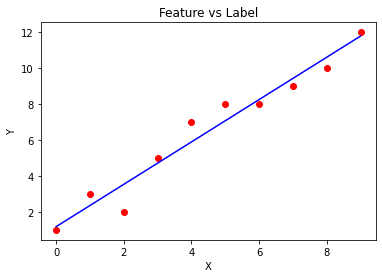

In [147]:
plt.scatter(feature, label, c='r')
plt.plot(feature, (b+(w*feature)), c='b')
plt.title("Feature vs Label")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

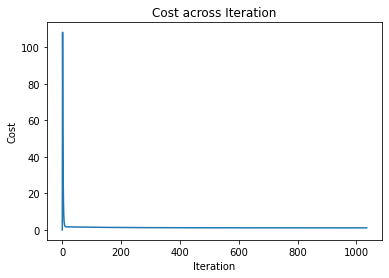

In [151]:
plt.plot(np.arange(len(costs)), costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost across Iteration")
plt.show()

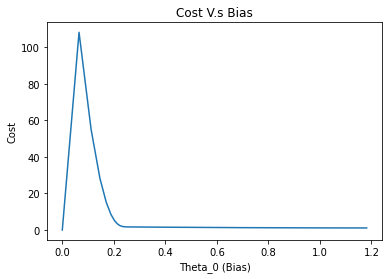

In [152]:
plt.plot(b_s, costs)
plt.xlabel("Theta_0 (Bias)")
plt.ylabel("Cost")
plt.title("Cost V.s Bias")
plt.show()

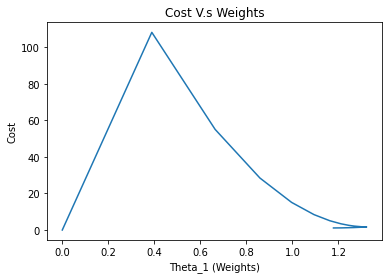

In [153]:
plt.plot(weights, costs)
plt.xlabel("Theta_1 (Weights)")
plt.ylabel("Cost")
plt.title("Cost V.s Weights")
plt.show()

### Linear Regression SKLEARN 

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression().fit(feature.reshape(-1,1), label)

In [34]:
reg.score(feature.reshape(-1,1), label)

0.952538038613988

In [40]:
print("Theta_0 = ", reg.intercept_)

Theta_0 =  1.2363636363636363


In [39]:
print("Theta_1 = ", reg.coef_[0])

Theta_1 =  1.1696969696969697


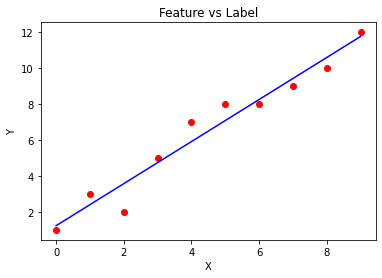

In [72]:
plt.scatter(feature, label, c='r')
plt.plot(feature, (reg.intercept_+(reg.coef_[0]*feature)), c='b')
plt.title("Feature vs Label")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()